# 🛒 Online Retail ETL Analysis

This notebook presents an analysis of transactional data from a UK-based online retailer.  
The data has undergone a full ETL pipeline including:

- Data cleaning
- Business logic processing
- Supplier and geographical enrichment

The goal is to extract meaningful business insights from the cleaned dataset.


📌 Load Data & Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for styling
sns.set(style="whitegrid")

# Load cleaned data
df = pd.read_parquet('output/processed_data.parquet')

# Preview
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,YearMonth,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.3,2010-12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.0,2010-12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,8


## 📊 Dataset Overview
Let's take a quick look at the structure of the cleaned dataset.


In [2]:
print("Shape:", df.shape)
df.info()
df.describe(include='all')
print("Unique Countries:", df['Country'].nunique())
print("Unique Products:", df['Description'].nunique())


Shape: (392732, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392732 entries, 0 to 392731
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  int64         
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  Float64       
 6   CustomerID   392732 non-null  int64         
 7   Country      392732 non-null  object        
 8   TotalAmount  392732 non-null  Float64       
 9   YearMonth    392732 non-null  object        
 10  Hour         392732 non-null  int32         
dtypes: Float64(2), datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 32.2+ MB
Unique Countries: 37
Unique Products: 3877


## 📈 Monthly Sales Trend
Analyzing how total revenue evolved over time on a monthly basis.


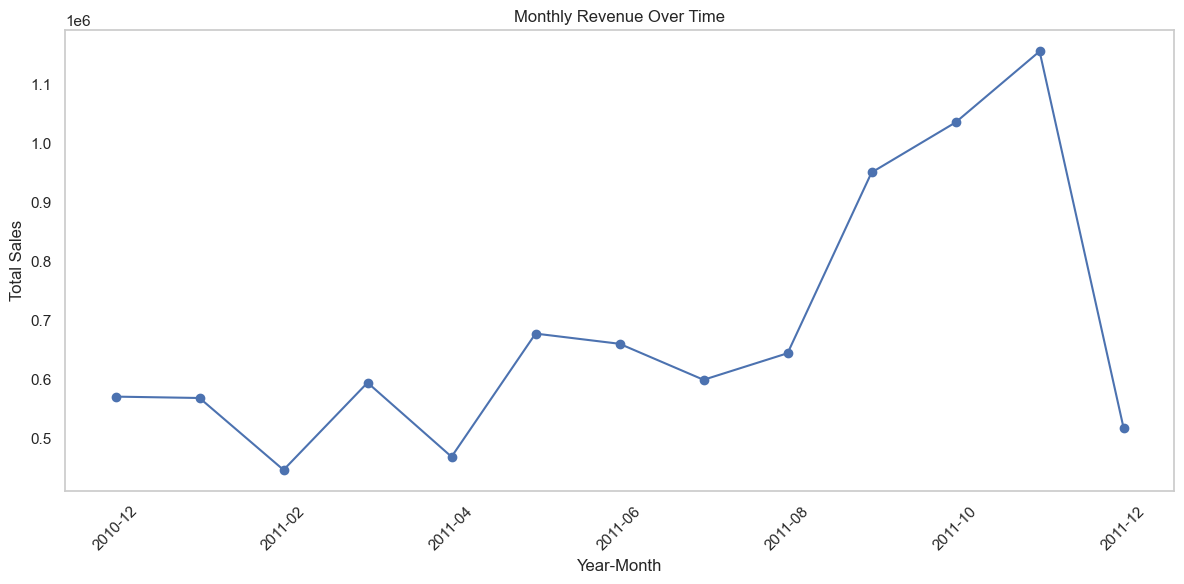

In [5]:
monthly_sales = df.groupby("YearMonth")["TotalAmount"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Revenue Over Time")
plt.ylabel("Total Sales")
plt.xlabel("Year-Month")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## 🌍 Top 10 Countries by Revenue
Which countries generated the most sales?


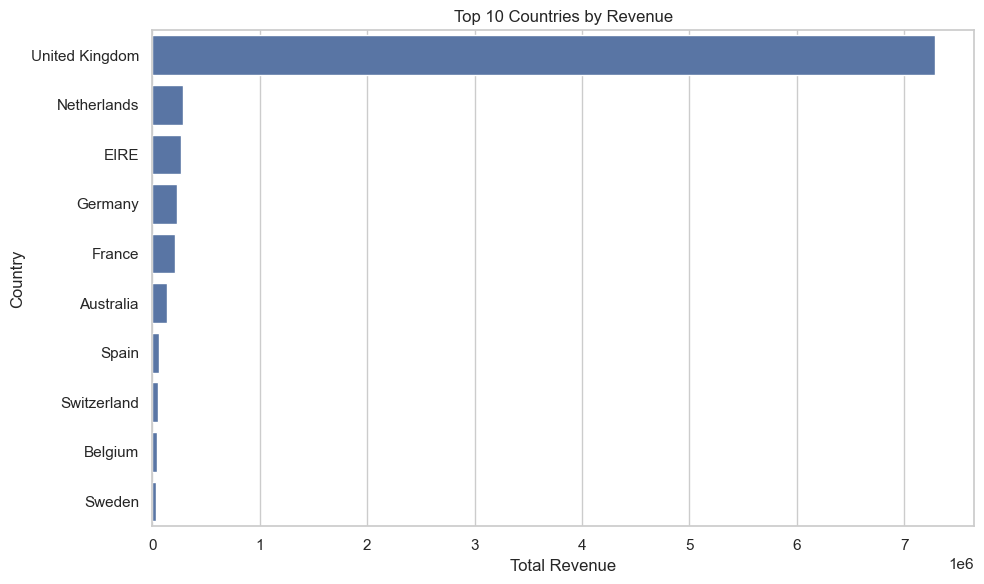

In [6]:
top_countries = df.groupby("Country")["TotalAmount"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
